In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
#train = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")

# daa from Titanic Dataset, v3.5 biostat.mc.vanderbilt.edu › wiki › pub › Main › DataSets › titanic3
data = pd.read_excel("titanic3.xls")
print(data.head(2))
print(data.shape)
print(data.isnull().sum())

   pclass  survived                            name     sex      age  sibsp  \
0       1         1   Allen, Miss. Elisabeth Walton  female  29.0000      0   
1       1         1  Allison, Master. Hudson Trevor    male   0.9167      1   

   parch  ticket      fare    cabin embarked boat  body  \
0      0   24160  211.3375       B5        S    2   NaN   
1      2  113781  151.5500  C22 C26        S   11   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
(1309, 14)
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [7]:
# NUMERICAL FEATURES
X = data[["fare", "parch", "age","sibsp"]] #samples 
y = pd.DataFrame(data = data["survived"], columns= ['survived']) #target/label

# missing age
X["age"].fillna(X["age"].mean(), inplace = True)

# missing fare
X["fare"].fillna(X["fare"].mean(), inplace = True)

# CATEGORICAL dummy vars 
# C = Cherbourg, Q = Queenstown, S = Southampton
embarked = pd.get_dummies(data["embarked"])
# female or male
sex = pd.get_dummies(data["sex"])
#1 = 1st, 2 = 2nd, 3 = 3rd
pclass = pd.get_dummies(data["pclass"],"class")

#X = pd.concat([X, embarked])
#X = X.append(embarked)
X = X.join(embarked)
X = X.join(sex)
X = X.join(pclass)
X.head()


#verify no missing values
X.isnull().sum()

# TODO 
# 1 cabin
# 2 FEATURE GENERATION
# 3 normilizing data


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


fare       0
parch      0
age        0
sibsp      0
C          0
Q          0
S          0
female     0
male       0
class_1    0
class_2    0
class_3    0
dtype: int64

In [8]:
X["age"].mean()

29.881134512428055

In [9]:
print (X.shape)
print (X.head())
print (y.head())

(1309, 12)
       fare  parch      age  sibsp  C  Q  S  female  male  class_1  class_2  \
0  211.3375      0  29.0000      0  0  0  1       1     0        1        0   
1  151.5500      2   0.9167      1  0  0  1       0     1        1        0   
2  151.5500      2   2.0000      1  0  0  1       1     0        1        0   
3  151.5500      2  30.0000      1  0  0  1       0     1        1        0   
4  151.5500      2  25.0000      1  0  0  1       1     0        1        0   

   class_3  
0        0  
1        0  
2        0  
3        0  
4        0  
   survived
0         1
1         1
2         0
3         0
4         0


In [10]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.3, shuffle = True, random_state=33)

print(X.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X.to_csv("X.csv", index=False)
y.to_csv("y.csv", index=False)

X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)


(1309, 12)
(916, 12)
(916, 1)
(393, 12)
(393, 1)


# Comparison of Logistic Regression and Random Forest applied to the Titanic survival dataset

Motivation:
We used publically avaialabe Titanic dataset to compare the perfomance of Logistic Regression vs Random Forest
models with what ???

# Initial Data Analysis

Dataset : Titanic3.5.xls
Data Set of 1309 samples, 70% used for training, 30% for test
Predictors: 13 out of which 8 are numerical and 5 categorical features
We removed "cabin", "body" and "body" as it contained in more than 50% of the samples
    

Sex was a decisive factor in surviving as shown below

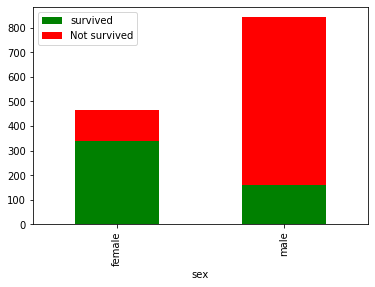

In [16]:
data["Not survived"] = 1 - data["survived"]
sexData = data.groupby("sex").agg("sum")[["survived", "Not survived"]]
sexData.plot(kind = "bar", stacked=True,color=['g','r'])

Also being in class 1,2 seems to correlate with surviving sa shown below

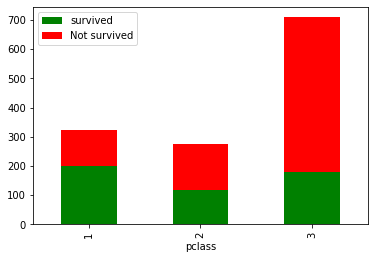

In [18]:
classData = data.groupby("pclass").agg("sum")[["survived", "Not survived"]]
classData.plot(kind = "bar", stacked=True,color=['g','r'])

For numerical features "age", "sibsp","fare" we looked at mean and deviation of values across 2 classes, we observed 
that younger people, people without siblings and people with more expensive tickes had higher chance to survive. 

In [33]:

print("       MEAN")      
print(data.groupby("survived")[["age", "sibsp", "fare"]].mean())
print("*" * 40)
print("       STD DEV")
print(data.groupby("survived")[["age", "sibsp", "fare"]].std())

       MEAN
                age     sibsp       fare
survived                                
0         30.545369  0.521632  23.353831
1         28.918228  0.462000  49.361184
****************************************
       STD DEV
                age     sibsp       fare
survived                                
0         13.922539  1.210449  34.145096
1         15.061481  0.685197  68.648795


# MODEL 1 - Logistic Regression

Description:
Logistic regression model the relationship between depentent variable and the independent variables using a logistic function. 

PROS
Fast and Efficient implementation
Probabiliy scores available for observations
Regularisation can be used to solve multi-collinerarity issue

CONS
Does not do well when the number of features is big
Does not perform well on large number of categorical features
REquires transformation of non linear features

# MODEL 2 - Random Forest 

Description
Random Forest Estimator builds an ensemble containing a number of decision trees, trained on various sab samples of the train data set and use averaging/ voting to improve accuracy and avoid overfitting

PROS
Very flexible and very accurate
Does not require data preparation
Able to produce feature importance ranking
Provide efficient estimate of test error even without undertaking cross validation.

CONS
More samples wont improve accuracy
Requires longer computation time and memory comparing to Logistic Regression
Inherintly less interpretable.

# Hypothesis Statement

We expect both models to perform relatively well to reach 80% accuracy , 
and for Random Forest to achieve slightly higher accuracy


# Choice of Training and evaluation methodology

# Choice of parameter and results

Logistic Regression
1. Learner: logistic ( as we are doing logistic reg)
2. Regularization: ridge ( proved to have better accuracy )
3. Solver: bfgs (Broyden-Fletcher-Goldfarb-Shanno quasi-Newton algorithm )
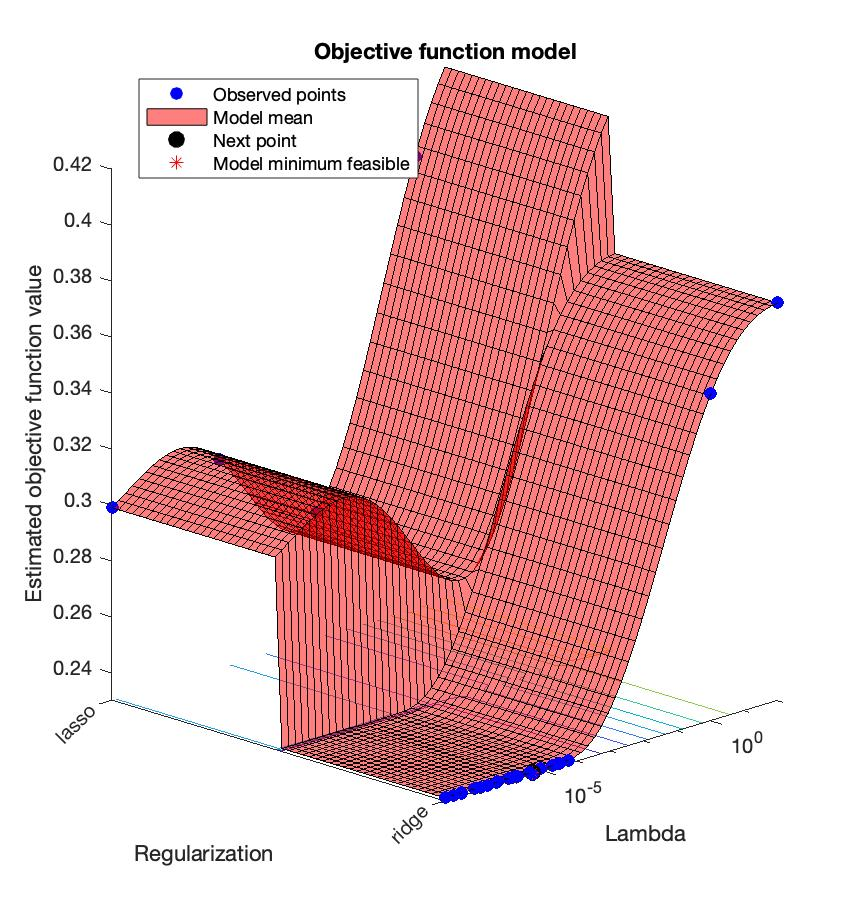

Random Forest
1.
2.
3.


||Train | Cross Valid | Test |
|---|---|---|---|
| Logistic Reg |0.77|0.76|0.824|
|---|---|---|---|
| Random Forest|||

# Analysis


# Future Works

We learned that Logistic regression requires more data preprocessing while Random Forests performance improves on hyperparameter optimisation
In the future work we could try and incorporate predictors that we omitted from our data set : "cabin","boat" and "body"